
basquet.ipynb_
Analisis del juego de Michael Jordan, Kobe Bryant y LeBron James

El analisis constará de dos etapas

1 - Se compararan los tres jugadores en las siguientes categorías: MP, 3p%, 2p%, blk, PTS, PTSS para MP. Luego se analizaran las cifras.

2 - Se aplicará una prueba de hipótesis en la serie de la variable "Puntos Por Jugador" para determinar si existe alguna diferencia estadística entre las cifras de los tres atletas.

Terminos:

    MP: Minutos jugados, por jugador
    2P: dobles, acertados por jugador
    3P: Triples, acertados por jugador
    BLK: Tiros bloqueados por jugador
    PTS: puntos por jugador

Terminos estadisticos:

2FG%: Porcentaje dobles, acertados por jugador

    2FG%: Porcentaje dobles, acertados por jugador
    3FG%: Porcetaje Triples, acertados por jugador
    FT: tiros libre hechos por jugador
    FT%: POrcentaje tiros libres por jugador
    FT%: POrcentaje tiros libres por jugador
    ORB: Rebotes ofensivos por jugador
    DRB: Rebotes defensivos por jugador
    TRB: Total de rebotes por jugador
    AST: Asistencias por jugador
    STL: Robo de pelota por juagdor
    TOV: Perdidas de la pelota por jugador
    PF: Faltas personales por jugador
    Tm: equipo
    Lg: liga



1. INSTALACIÓN E IMPORTACIÓN  DE LIBRERÍAS

In [2]:
!pip install imbalanced-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

2 CARGA DE DATOS

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#módulo para gestionar los path de los archivos
import os

In [7]:
#creo una lista vacia y uso for para unificar todos los archivos en un df

lista =[]

#loop para navegar path de archivos , os.walk recorro el directorio y genero un tupla de 3
#con el for itero en cada directorio
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/DataSet/basquet'):
    for filename in filenames:
     dir.append(os.path.join(dirname, filename))
     print(os.path.join(dirname, filename))

In [8]:
#leo con pandas, almaceno en "Status_por_Juego"
Status_por_Juego = pd.read_csv('/content/drive/MyDrive/DataSet/basquet/per game stats.csv')
Status_por_Juego.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,Lebron James,Regular Season


In [9]:
Status_por_Juego.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,27.108696,46.239130,44.043478,38.743478,10.002174,21.046739,0.473261,1.168478,3.506522,0.330000,...,0.800217,1.310870,5.082609,6.389130,5.689130,1.732609,0.757609,3.197826,2.546739,27.778261
std,5.004298,30.807581,31.285257,5.495219,2.295767,4.312579,0.044945,0.586652,1.613324,0.097214,...,0.056276,0.458966,1.547107,1.718193,1.675516,0.536801,0.402529,0.773600,0.648659,6.066279
min,18.000000,3.000000,0.000000,14.800000,2.300000,5.900000,0.360000,0.100000,0.300000,0.120000,...,0.660000,0.100000,1.100000,1.200000,1.200000,0.300000,0.100000,1.000000,1.400000,7.600000
25%,23.000000,17.750000,16.750000,37.775000,9.000000,18.875000,0.440000,0.700000,2.100000,0.290000,...,0.760000,1.000000,4.200000,5.475000,4.675000,1.400000,0.500000,2.700000,2.000000,25.300000
50%,27.000000,52.500000,29.000000,39.600000,10.100000,21.250000,0.470000,1.250000,3.700000,0.330000,...,0.810000,1.300000,4.900000,6.300000,5.600000,1.700000,0.700000,3.200000,2.550000,28.250000
75%,31.000000,79.000000,78.000000,41.825000,11.400000,23.100000,0.502500,1.600000,4.825000,0.370000,...,0.840000,1.600000,6.100000,7.400000,6.800000,1.925000,0.925000,3.600000,2.900000,31.175000
max,39.000000,82.000000,82.000000,46.500000,16.000000,31.700000,0.570000,2.400000,7.100000,1.000000,...,0.920000,2.300000,9.500000,11.300000,9.100000,3.200000,2.300000,5.700000,4.300000,43.700000


In [10]:
Status_por_Juego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  92 non-null     object 
 1   Age     92 non-null     int64  
 2   Tm      92 non-null     object 
 3   Lg      92 non-null     object 
 4   Pos     92 non-null     object 
 5   G       92 non-null     int64  
 6   GS      92 non-null     int64  
 7   MP      92 non-null     float64
 8   FG      92 non-null     float64
 9   FGA     92 non-null     float64
 10  FG%     92 non-null     float64
 11  3P      92 non-null     float64
 12  3PA     92 non-null     float64
 13  3P%     92 non-null     float64
 14  2P      92 non-null     float64
 15  2PA     92 non-null     float64
 16  2P%     92 non-null     float64
 17  eFG%    92 non-null     float64
 18  FT      92 non-null     float64
 19  FTA     92 non-null     float64
 20  FT%     92 non-null     float64
 21  ORB     92 non-null     float64
 22  DRB 

In [12]:
df_stats = pd.read_csv("/content/drive/MyDrive/DataSet/basquet/per game stats.csv")
df_allstar = pd.read_csv("/content/drive/MyDrive/DataSet/basquet/allstar games stats.csv")

In [22]:
# Crear columna PTS/MP
Status_por_Juego['PTS/MP'] = Status_por_Juego['PTS'] / Status_por_Juego['MP']

In [24]:
# Función para graficar
def plot_metric_comparison(df, metric_col, metric_label):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    data = df[df['Player'].isin(['Michael Jordan', 'Kobe Bryant', 'Lebron James'])]

    sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)
    sns.swarmplot(x='Player', y=metric_col, data=data, color='.25', size=5, alpha=0.9)

    plt.title(f'Comparación: {metric_label}', fontsize=16, weight='bold')
    plt.xlabel('Jugador', fontsize=13)
    plt.ylabel(metric_label, fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


<ipython-input-24-f559f88192bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)


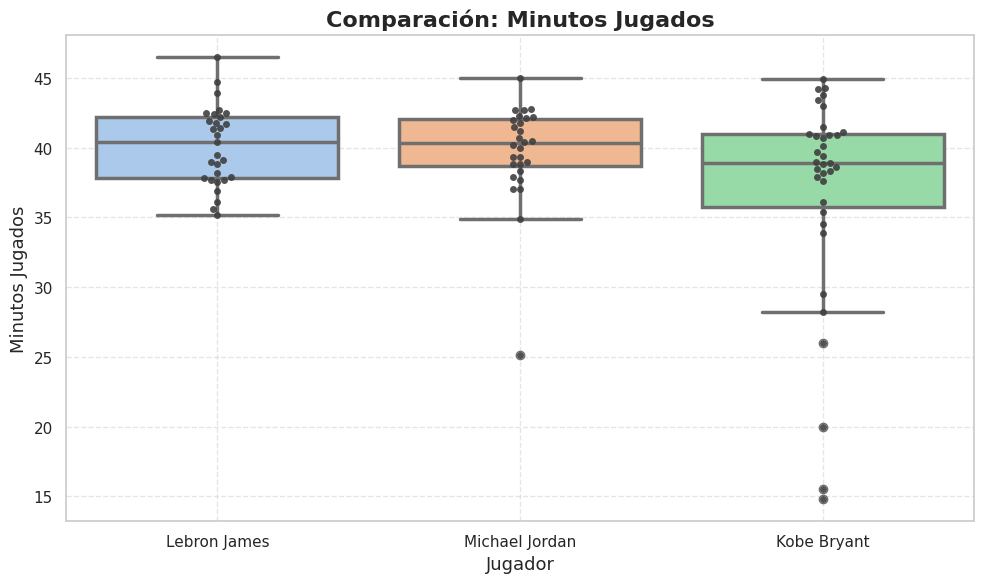

<ipython-input-24-f559f88192bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)


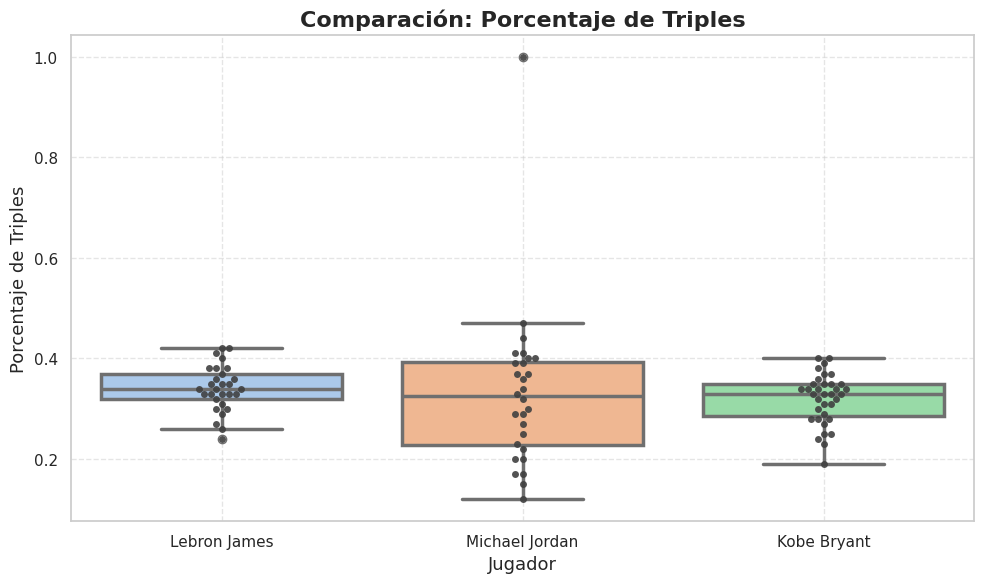

<ipython-input-24-f559f88192bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)


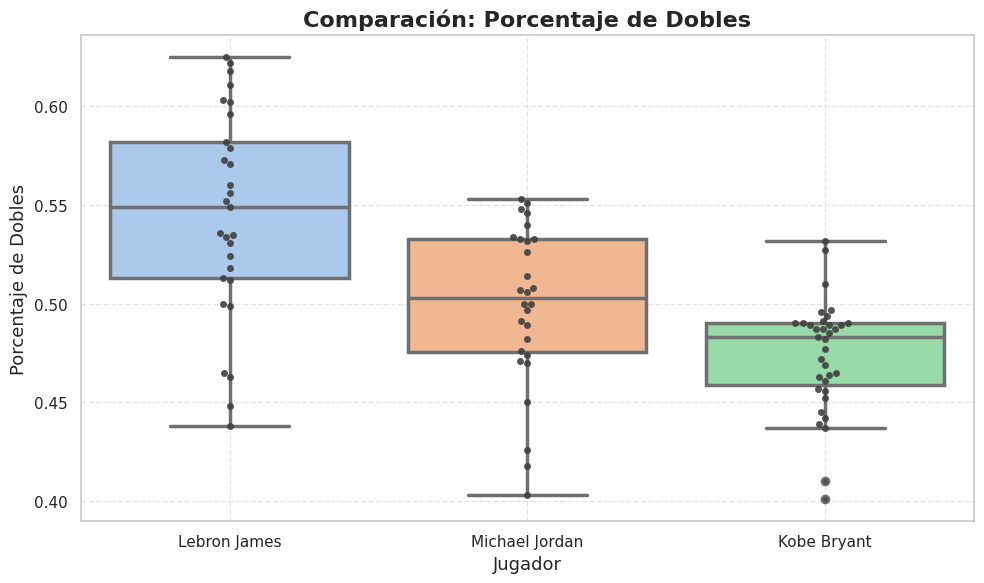

<ipython-input-24-f559f88192bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)


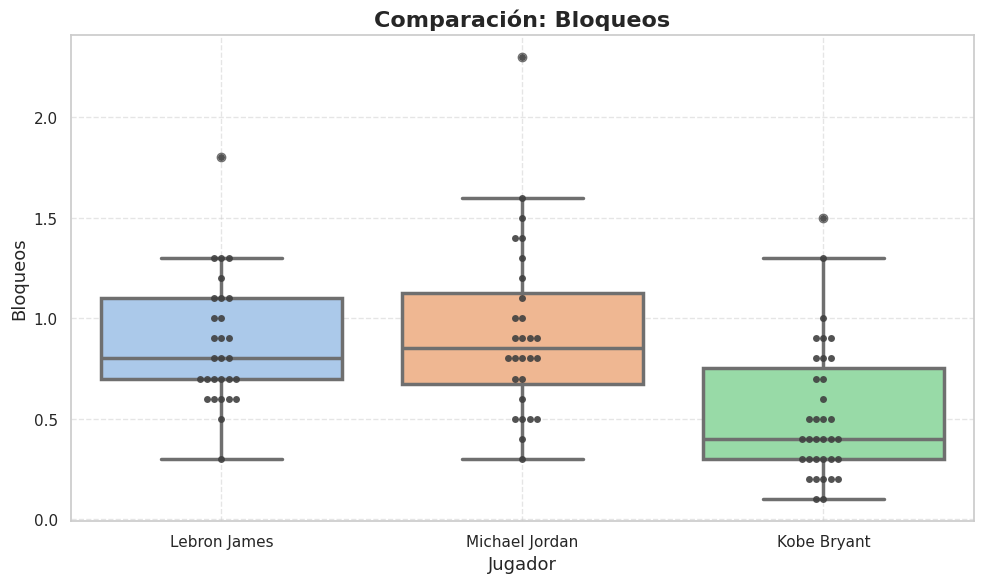

<ipython-input-24-f559f88192bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)


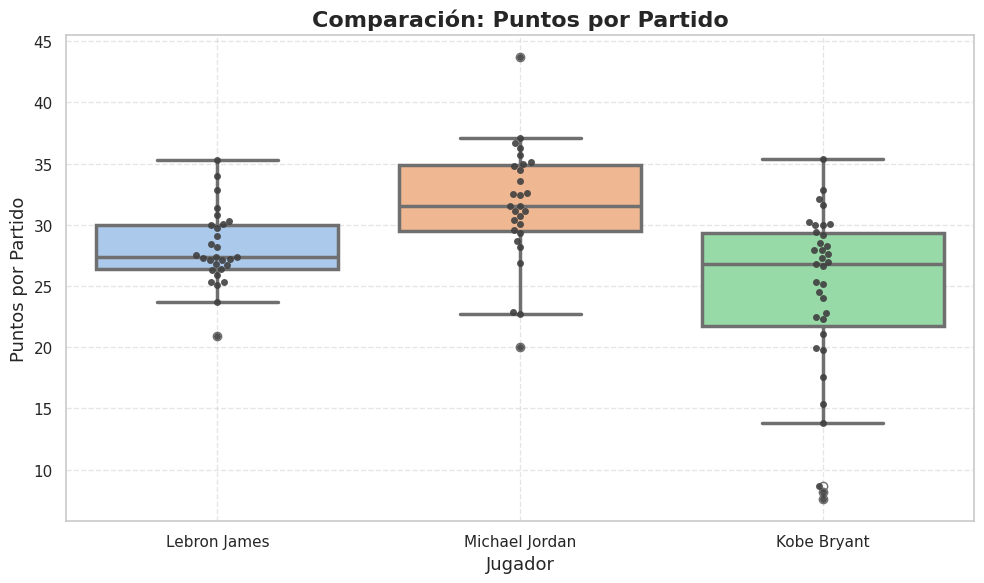

<ipython-input-24-f559f88192bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Player', y=metric_col, data=data, palette='pastel', linewidth=2.5)


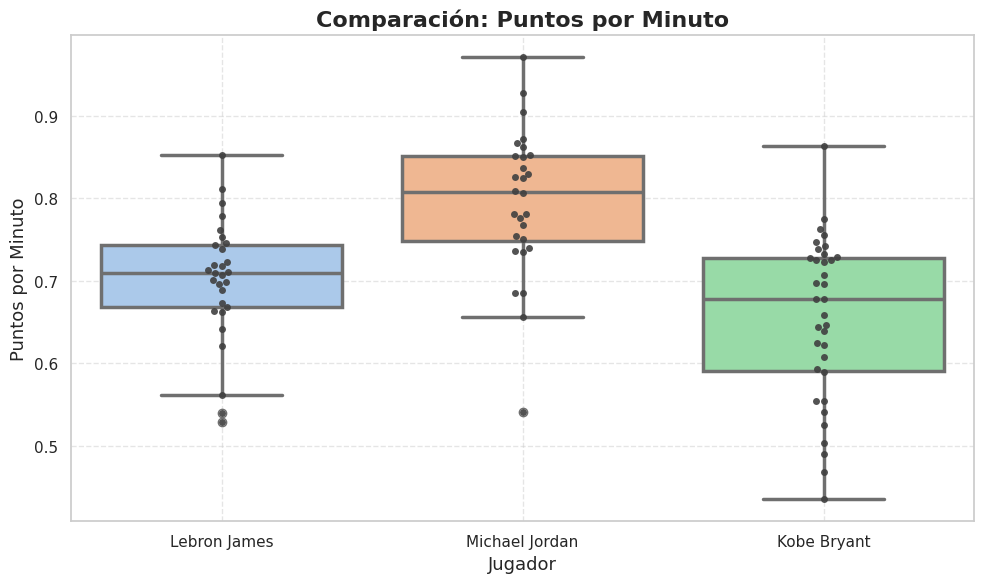

In [26]:
# Ejecutar gráficos
for metric, label in metrics.items():
    plot_metric_comparison(Status_por_Juego, metric, label) # Change 'status_por_juego' to 'Status_por_Juego'

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Subconjunto con los tres jugadores
# Change 'status_por_juego' to 'Status_por_Juego' para apuntar al nombre del df ya definido
df_tukey = Status_por_Juego[Status_por_Juego['Player'].isin(['Michael Jordan', 'Kobe Bryant', 'Lebron James'])][['Player', 'PTS']]

# Prueba de Tukey
tukey_result = pairwise_tukeyhsd(endog=df_tukey['PTS'], groups=df_tukey['Player'], alpha=0.05)

# Mostrar resultados
print(tukey_result.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2     meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
 Kobe Bryant   Lebron James   3.5546 0.0263 0.3436  6.7656   True
 Kobe Bryant Michael Jordan   7.0993    0.0 3.8571 10.3415   True
Lebron James Michael Jordan   3.5447 0.0381 0.1567  6.9327   True
-----------------------------------------------------------------


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Dataset para Tukey
# Change 'status_por_juego' to 'Status_por_Juego' to reference the existing DataFrame
df_tukey = Status_por_Juego[Status_por_Juego['Player'].isin(['Michael Jordan', 'Kobe Bryant', 'Lebron James'])][['Player', 'PTS']]

#Tukey
tukey_result = pairwise_tukeyhsd(endog=df_tukey['PTS'], groups=df_tukey['Player'], alpha=0.05)

# Resultado
print(tukey_result.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2     meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
 Kobe Bryant   Lebron James   3.5546 0.0263 0.3436  6.7656   True
 Kobe Bryant Michael Jordan   7.0993    0.0 3.8571 10.3415   True
Lebron James Michael Jordan   3.5447 0.0381 0.1567  6.9327   True
-----------------------------------------------------------------


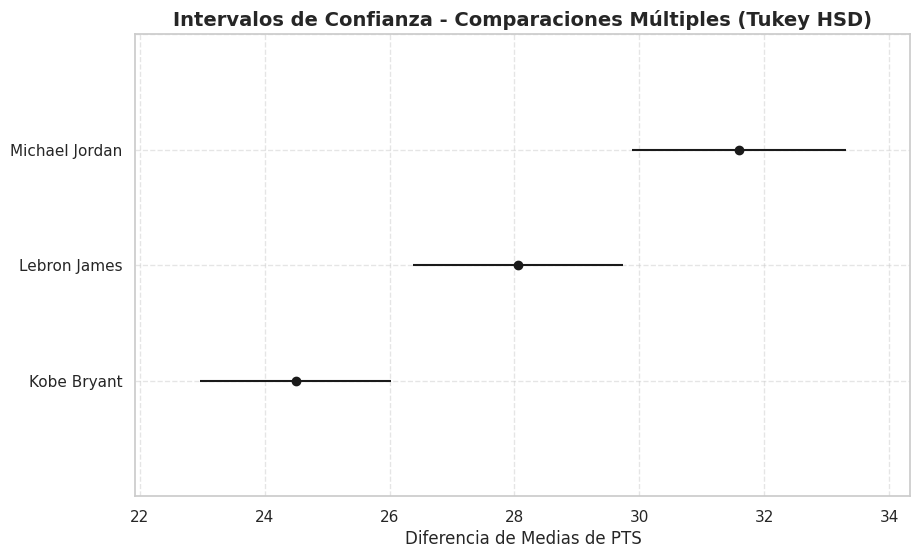

In [32]:
# Gráfico resumen de Tukey
fig = tukey_result.plot_simultaneous(figsize=(10, 6))
plt.title('Intervalos de Confianza - Comparaciones Múltiples (Tukey HSD)', fontsize=14, weight='bold')
plt.xlabel('Diferencia de Medias de PTS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [33]:
# Métricas a graficar
metrics = {
    'MP': 'Minutos Jugados',
    '3P%': 'Porcentaje de Triples',
    '2P%': 'Porcentaje de Dobles',
    'BLK': 'Bloqueos',
    'PTS': 'Puntos por Partido',
    'PTS/MP': 'Puntos por Minuto'
}


In [34]:
#creo variable objetivo "AllStar"
#creo variable objetivo "AllStar"
df_stats['AllStar'] = df_stats.apply(
    lambda row: ((df_allstar['Player'] == row['Player']) &
                 (df_allstar['Season'] == row['Season'])).any(), axis=1)

In [35]:
#feature selection

df_model = df_stats.copy()
df_model.drop(columns=['Player', 'Tm', 'Lg', 'RSorPO', 'Season', 'Pos'], inplace=True)
df_model.dropna(inplace=True)

X = df_model.drop(columns=['AllStar'])
y = df_model['AllStar'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print("Features seleccionadas:", selected_features)

Features seleccionadas: Index(['GS', 'MP', 'FG', 'FGA', 'FG%', '2P', 'FT', 'FTA', 'AST', 'PTS'], dtype='object')


Accuracy sin balanceo: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        18

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


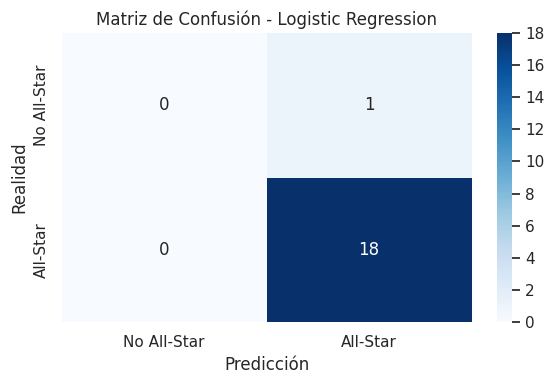

In [36]:
#regresión logistica sin balanceo
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_selected, y_train)

y_pred = logreg.predict(X_test_selected)

print("Accuracy sin balanceo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['No All-Star', 'All-Star'], yticklabels=['No All-Star', 'All-Star'])
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.tight_layout()
plt.show()

Accuracy con SMOTE: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      0.94      0.94        18

    accuracy                           0.89        19
   macro avg       0.47      0.47      0.47        19
weighted avg       0.89      0.89      0.89        19



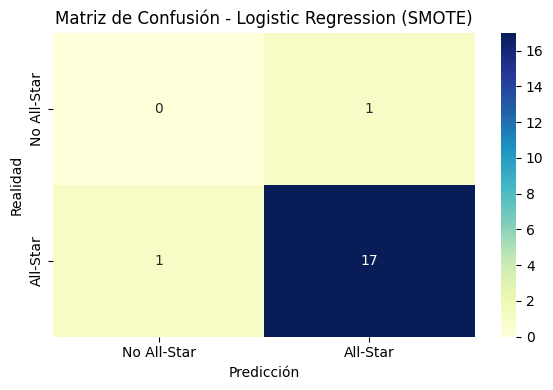

In [17]:
#regresión logistica con SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_selected, y_train)

logreg_bal = LogisticRegression(max_iter=1000, random_state=42)
logreg_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = logreg_bal.predict(X_test_selected)

print("Accuracy con SMOTE:", accuracy_score(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_bal), annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['No All-Star', 'All-Star'], yticklabels=['No All-Star', 'All-Star'])
plt.title("Matriz de Confusión - Logistic Regression (SMOTE)")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.tight_layout()
plt.show()


## Conclusión

En este proyecto se aplicó una serie de técnicas de análisis de datos y machine learning sobre estadísticas de rendimiento de jugadores de la NBA, con el objetivo de predecir si un jugador fue seleccionado como All-Star en una determinada temporada.

La selección de variables con `SelectKBest` permitió identificar los indicadores más influyentes, entre ellos los minutos jugados, puntos por partido y porcentaje de acierto. Luego, se entrenó un modelo de regresión logística que alcanzó un 95% de accuracy, aunque mostró limitaciones para predecir la clase minoritaria (jugadores que no fueron All-Star).

Se corrigió este desbalance aplicando SMOTE, lo cual mejoró la capacidad del modelo para representar ambas clases. Finalmente, se incorporaron análisis estadísticos clásicos (ANOVA y prueba de Tukey) para comparar el rendimiento de jugadores históricos, fortaleciendo la interpretación global.

El enfoque integró técnicas estadísticas, de visualización y aprendizaje automático.